# Análise Multivariada com Python
https://buildmedia.readthedocs.org/media/pdf/python-for-multivariate-analysis/latest/python-for-multivariate-analysis.pdf
## Preparando o ambiente
### Instalando Python

Python é a linguagem preferida entre os cientistas de dados e uma excelente plataforma no tratamento, análise de dados e geração de modelos automatizados.

Anaconda é uma plataforma *open source* para cientistas de dados, ele une o Python e R (linguagem de programação para estatística), além de módulos do Scala.

Faça o *download* da Anaconda:
- Windows: https://repo.anaconda.com/archive/Anaconda3-2020.07-Windows-x86_64.exe
- MacOS: https://repo.anaconda.com/archive/Anaconda3-2020.07-MacOSX-x86_64.pkg
- Linux: https://repo.anaconda.com/archive/Anaconda3-2020.07-Linux-x86_64.sh

### Bibliotecas
As seguintes livrarias serão usadas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

In [2]:
sns.set_style("darkgrid")
np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [3]:
# Especificando a fonte do arquivo
fonte = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Lendo o arquivo
dados = pd.read_csv(fonte, header=None)

# Renomeando as colunas para X1, X2 ... Xi.
dados.columns = ["X" + str(i) for i in range(0, len(dados.columns))]

# Ajustando a primeira coluna "X1" para string
dados.X0 = dados.X0.astype(str)

# Visualisando o DataFrame
dados

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Definindo as variáveis independentes
X = dados.loc[:, "X1":]

# Definindo a variável dependente
y = dados.X0

## Criando gráficos
### Gráfico de dispersão

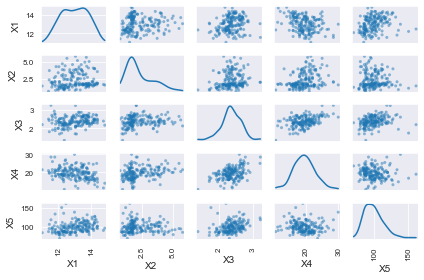

In [5]:
# Selecionando os cinco primeiros dados
variaveis = dados.loc[:, "X1":"X5"]

pd.plotting.scatter_matrix(variaveis, diagonal="kde")
plt.tight_layout()
plt.show()

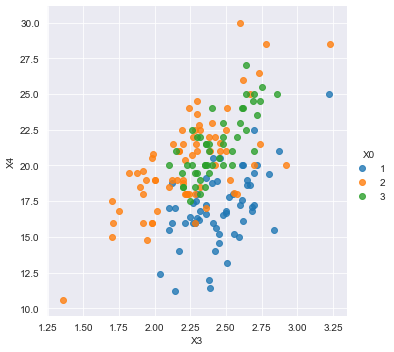

In [6]:
sns.lmplot("X3", "X4", dados, hue="X0", fit_reg=False)

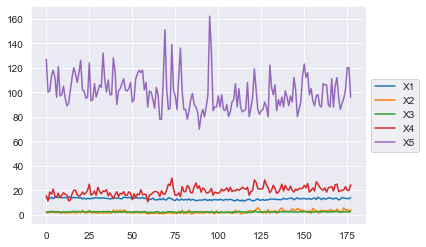

In [7]:
# Creating a profile plot

ax = dados[['X1', 'X2', 'X3', 'X4', 'X5']].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Calculando as estatísticas descritivas

In [8]:
# Calculando as médias
X.apply(np.mean)

X1      13.000618
X2       2.336348
X3       2.366517
X4      19.494944
X5      99.741573
X6       2.295112
X7       2.029270
X8       0.361854
X9       1.590899
X10      5.058090
X11      0.957449
X12      2.611685
X13    746.893258
dtype: float64

In [9]:
# Calculando os desvios padrão
X.apply(np.std)

X1       0.809543
X2       1.114004
X3       0.273572
X4       3.330170
X5      14.242308
X6       0.624091
X7       0.996049
X8       0.124103
X9       0.570749
X10      2.311765
X11      0.227929
X12      0.707993
X13    314.021657
dtype: float64

In [10]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Médias e variâncias por grupo

In [11]:
# Selecionando os dados da classe 2
dados_classe2 = dados[y == "2"]

# Calculando as médias
dados_classe2.loc[:, "X1":].apply(np.mean)

X1      12.278732
X2       1.932676
X3       2.244789
X4      20.238028
X5      94.549296
X6       2.258873
X7       2.080845
X8       0.363662
X9       1.630282
X10      3.086620
X11      1.056282
X12      2.785352
X13    519.507042
dtype: float64

In [12]:
# Calculando os desvios padrão
dados_classe2.loc[:, "X1":].apply(np.std)

X1       0.534162
X2       1.008391
X3       0.313238
X4       3.326097
X5      16.635097
X6       0.541507
X7       0.700713
X8       0.123085
X9       0.597813
X10      0.918393
X11      0.201503
X12      0.493064
X13    156.100173
dtype: float64

In [13]:
def printMeanAndStdByGroup(variables, group_variable):
    dados_groupby = variables.groupby(group_variable)
    print("## Means:")
    display(dados_groupby.apply(np.mean))
    print("\n## Standard deviations")
    display(dados_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(dados_groupby.apply(len)))

In [14]:
printMeanAndStdByGroup(X, y)

## Means:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
X0,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
X0,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
X0,
1,59
2,71
3,48


### Variância entre grupos e variância dentro dos grupos

In [19]:
# Calculando a variância dentro dos grupos
def calcWithinGroupsVariance(variable, groupvariable):
    # Descobrindo o número de grupos
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # Calculando a média e o desvio padrão para cada grupo
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)
        # Calculando o desvio padrão do grupo:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # Calculando a variância dentro dos grupos
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

In [18]:
calcWithinGroupsVariance(X.X1, y)

0.2620524691539065

In [30]:
# Calculando a variância entre os grupos
def calcBetweenGroupsVariance(variable, groupvariable):
    # Descobrindo o número de grupos
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # Calculando a média total
    grandmean = np.mean(variable)
    # Calculando a média e o desvio padrão para cada grupo
    numtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)
        # Calculando a média e o desvio padrão do grupo:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        numtotal = numtotal + numi
    # Calculando a variância dentro dos grupos
    Vb = numtotal / (numlevels - 1)
    return Vb

In [31]:
calcBetweenGroupsVariance(X.X1, y)

35.397424960269106

In [32]:
# Calculando a separação
calcBetweenGroupsVariance(X.X1, y) / calcWithinGroupsVariance(X.X1, y)

135.07762424279917

In [35]:
# Calculando a separação de todas as variaveis
def calcSeparations(variables, groupvariable):
    # Calculando a separação para cada variável,
    for variable in variables:
        variablei = variables[variable]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable: ", variable, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [36]:
calcSeparations(X, y)

variable:  X1 Vw= 0.2620524691539065 Vb= 35.397424960269106 separation= 135.07762424279917
variable:  X2 Vw= 0.8875467967465813 Vb= 32.789018486921364 separation= 36.94342496318368
variable:  X3 Vw= 0.0660721013425184 Vb= 0.8796113572487572 separation= 13.312901199991257
variable:  X4 Vw= 8.006811181211566 Vb= 286.41674636308926 separation= 35.77163740730921
variable:  X5 Vw= 180.65777316441023 Vb= 2245.50102788939 separation= 12.429584338149898
variable:  X6 Vw= 0.1912704752242267 Vb= 17.92835729428464 separation= 93.73300962036717
variable:  X7 Vw= 0.274707514337437 Vb= 64.26119502356416 separation= 233.92587268154927
variable:  X8 Vw= 0.011911702213279677 Vb= 0.32847015746162356 separation= 27.575417146965858
variable:  X9 Vw= 0.2461729437955417 Vb= 7.451995507777756 separation= 30.27138317022764
variable:  X10 Vw= 2.2849230813335426 Vb= 275.7080008223043 separation= 120.66401844100315
variable:  X11 Vw= 0.024487646943241362 Vb= 2.4810099149382907 separation= 101.31679539030002
vari